## 🧩 Notebook 07: Optimization & Minimization with SciPy

In [1]:
# Setup and Imports

import numpy as np
import pandas as pd
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.optimization_utils import (
    cost_quadratic,
    cost_nonconvex,
    multi_var_cost,
    get_bounds_2d,
    get_linear_constraint,
    run_minimization,
    run_scalar_minimization,
    evaluate_loss_surface
)
from utils.viz_utils import (
    plot_3d_loss_surface,
    plot_contour_loss_surface,
    save_and_show_plot
)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
EXPORT_PLOTS = Path("../exports/plots/07_optimization")
EXPORT_TABLES = Path("../exports/tables/07_optimization")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Scalar Minimization

In [2]:
# Minimize a simple convex function: (x - 3)^2

result_scalar = run_scalar_minimization(cost_quadratic)
print("Scalar minimization result:")
print(result_scalar)

Scalar minimization result:
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 1.9721522630525295e-31
       x: 3.0000000000000004
     nit: 5
    nfev: 8


## 🔹 Step 2: Non-convex Function Minimization

In [3]:
# Try a non-convex function to test global/local behavior

result_nonconvex = run_scalar_minimization(cost_nonconvex)
print("Non-convex minimization result:")
print(result_nonconvex)

Non-convex minimization result:
 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.47137838900136764
       x: 2.2430781487240616
     nit: 12
    nfev: 15


## 🔹 Step 3: Multivariate Minimization

In [4]:
x0 = [0.0, 0.0]  # initial guess

result_multi = run_minimization(
    func=multi_var_cost,
    x0=x0,
    bounds=get_bounds_2d(),
    constraints=get_linear_constraint()
)

print("Multivariate minimization with constraints:")
print(result_multi)

Multivariate minimization with constraints:
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.12503207081658713
                 x: [ 7.500e-01  2.250e+00]
               nit: 12
              nfev: 21
              njev: 7
              nhev: 0
          cg_niter: 9
      cg_stop_cond: 1
              grad: [-5.000e-01 -5.001e-01]
   lagrangian_grad: [-1.636e-09  1.631e-09]
            constr: [array([ 3.000e+00]), array([ 7.500e-01,  2.250e+00])]
               jac: [array([[ 1.000e+00,  1.000e+00]]), array([[ 1.000e+00,  0.000e+00],
                           [ 0.000e+00,  1.000e+00]])]
       constr_nfev: [0, 0]
       constr_njev: [0, 0]
       constr_nhev: [0, 0]
                 v: [array([ 5.001e-01]), array([-3.514e-05, -2.587e-06])]
            method: tr_interior_point
        optimality: 1.6357322840378176e-09
  constr_violation: 0.0
    execution_time: 0.0062236785888671875
         tr_radius

## 🔹 Step 4: Visualize Loss Surface

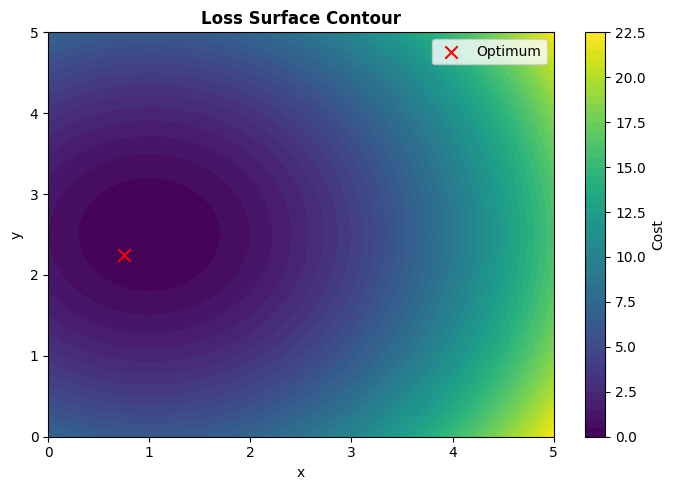

In [5]:
# Plot loss surface for the multivariate function

X, Y, Z = evaluate_loss_surface(multi_var_cost, x_range=(0, 5), y_range=(0, 5))

fig2 = plot_contour_loss_surface(X, Y, Z,
                                 optimum=(result_multi.x[0], result_multi.x[1]))
save_and_show_plot(fig2, EXPORT_PLOTS / "loss_surface_contour.png")

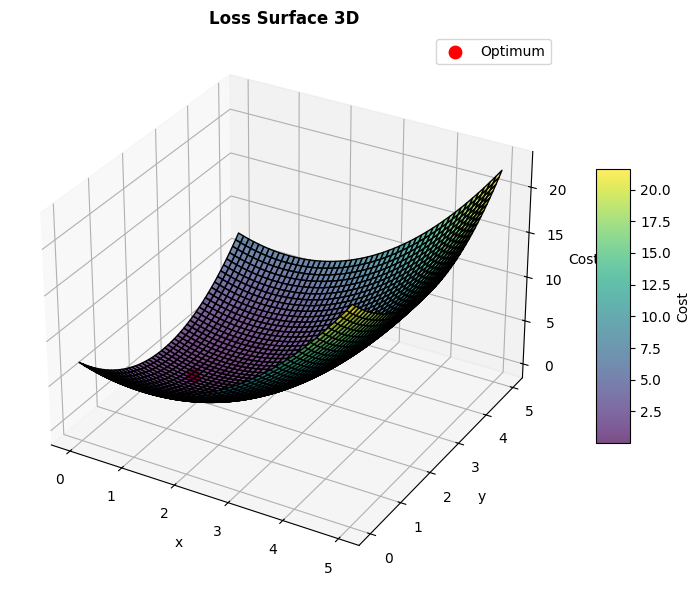

In [6]:
X, Y, Z = evaluate_loss_surface(multi_var_cost, x_range=(0, 5), y_range=(0, 5))
fig = plot_3d_loss_surface(X, Y, Z,
                           optimum=(result_multi.x[0], result_multi.x[1], result_multi.fun))
save_and_show_plot(fig, EXPORT_PLOTS / "loss_surface_3d.png")

## 🔹 Step 5: Export Optimization Results

In [7]:
from IPython.display import display

# Prepare results list
results_list = [
    {
        "Type": "Scalar Convex",
        "Solver": "Brent",
        "Success": result_scalar.success,
        "Result": round(result_scalar.fun, 4),
        "x": round(float(result_scalar.x), 4),
        "y": np.nan
    },
    {
        "Type": "Scalar Nonconvex",
        "Solver": "Brent",
        "Success": result_nonconvex.success,
        "Result": round(result_nonconvex.fun, 4),
        "x": round(float(result_nonconvex.x), 4),
        "y": np.nan
    },
    {
        "Type": "Multivariate",
        "Solver": getattr(result_multi, "method", "trust-constr"),
        "Success": result_multi.success,
        "Result": round(result_multi.fun, 4),
        "x": round(result_multi.x[0], 4),
        "y": round(result_multi.x[1], 4)
    }
]

# Create main results DataFrame
df_results = pd.DataFrame(results_list, columns=["Type", "Solver", "Success", "x", "y", "Result"])
df_results.to_csv(EXPORT_TABLES / "step5_optimization_results.csv", index=False)

In [8]:
# Export optimized parameters only
df_params = df_results[["Type", "x", "y"]]
df_params.to_csv(EXPORT_TABLES / "step5_optimized_parameters.csv", index=False)

# Styled notebook display
styled_df = (
    df_results.style
    .background_gradient(cmap="YlGnBu")
    .format(precision=4)
    .set_caption("📊 Optimization Results Summary")
)
display(styled_df)

,Type,Solver,Success,x,y,Result
0,Scalar Convex,Brent,True,3.0000,nan,0.0000
1,Scalar Nonconvex,Brent,True,2.2431,nan,-0.4714
2,Multivariate,tr_interior_point,True,0.7500,2.2500,0.1250


## 🧠 Key Takeaways
- `scipy.optimize.minimize()` supports constraints, bounds, and various solvers.
- Scalar and multivariate minimization are both accessible through consistent APIs.
- Visualizing loss surfaces helps diagnose convexity and local minima.
- Good initial guesses improve convergence speed and reliability.

## ✅ Summary
In this notebook, we:

- Used scalar and multivariate optimization techniques from SciPy
- Explored constrained minimization with bounds and linear constraints
- Visualized a loss surface for better interpretation
- Exported results and plots to the project structure